## Quick Stats: 2013 vs 2018 Presidential, Parliamentary and Local Elections
**DATE: August 22th, 2018**

### 2013 Voter Turnout Across All Harmonized Elections

In [2300]:
dpa.groupby(['province']).sum();

In [2301]:
# Make dataframes for harmonized election levels
dv = chk['count_regvoters'].set_index('province').copy() 
dr = rconcat.groupby(['province']).sum()[['votes_cast', 'votes_valid']]
dp = dpa.groupby(['province']).sum().reset_index()[['province', 'votes']].set_index('province')
dl = contested.groupby(['province']).sum().reset_index()[['province', 'votes']].set_index('province')

In [2302]:
# join the election turonout and volumes together
dvto = pd.concat([dv, dr, dp, dl], axis=1, keys=['reg', 'pres', 'parly', 'local'])
dvto.columns = [x[0]+"_"+x[1] for x in list(zip(dvto.columns.get_level_values(0), dvto.columns.get_level_values(1)))]
dvto.sort_values(by="pres_votes_cast",ascending=True, inplace=True)
#dvto =dvto[['pres_votes_cast', 'pres_votes_valid', 'parly_votes', 'local_votes']]

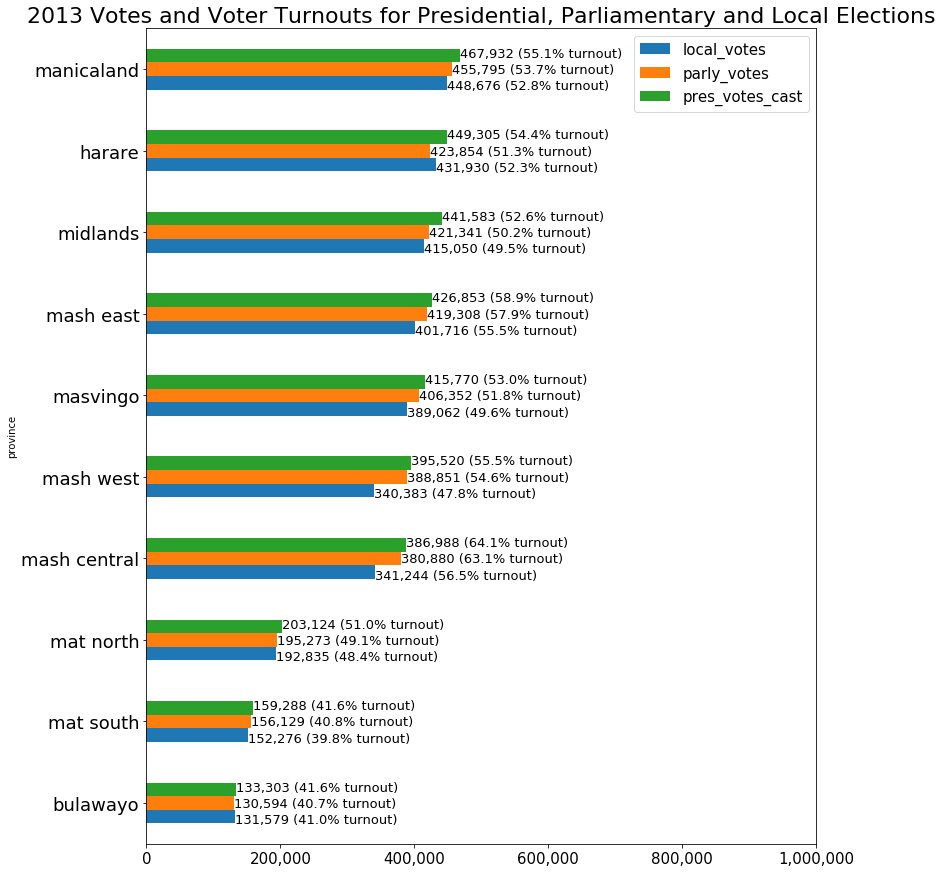

In [2338]:
# plot the voter turnouts
rt, rv= dvto.pres_votes_cast/dvto.reg_voter_pop,dvto.pres_votes_cast 
pt, pv = dvto.parly_votes/dvto.reg_voter_pop ,  dvto.parly_votes 
lt, lv = dvto.local_votes/dvto.reg_voter_pop , dvto.local_votes

d=dvto[['local_votes','parly_votes', 'pres_votes_cast']]
g=d.plot(
    kind="barh", title="2013 Votes and Voter Turnouts for Presidential, Parliamentary and Local Elections", 
                     figsize=(12,15) ,  fontsize=15);
g.set_xlim(0,1000000)

g.set_yticklabels(d.index,rotation=0, size=18)
g.title.set_size(22)
g.legend(fontsize=15)
for j in range(len(d)):
    g.text(d.iloc[j,0], j-0.25,  
           sep1000Formatter(d.iloc[j,0])+" ("+str(round(lt[j]*100, 1))+"%"+" turnout)", fontsize=13)
    g.text(d.iloc[j,1],  j-0.05, 
           sep1000Formatter(d.iloc[j,1])+" ("+str(round(pt[j]*100, 1))+"%"+" turnout)", fontsize=13)
    g.text(d.iloc[j,2],  j+0.15,
           sep1000Formatter(d.iloc[j,2])+" ("+str(round(rt[j]*100, 1))+"%"+" turnout)", fontsize=13)

g.get_xaxis().set_major_formatter(tic.FuncFormatter(lambda x, p: format(int(x), ',')))

In [2418]:
# Vote differences between the election levels
dvto['parly_pres_diff'] = dvto['pres_votes_cast'] - dvto['parly_votes']
dvto['local_parly_diff'] = dvto['parly_votes'] - dvto['local_votes']
dvto['local_pres_diff'] = dvto['pres_votes_cast']-dvto['local_votes']

dvto['parly_pres_pct'] = 1-dvto['parly_votes']/dvto['pres_votes_cast']
dvto['local_parly_pct'] = 1-dvto['local_votes']/dvto['parly_votes'] 
dvto['local_pres_pct'] = 1- dvto['local_votes']/dvto['pres_votes_cast']


Total/sum of variances 
 ---------------------------------------- 
 local_pres_diff     234,915
local_parly_diff    133,626
parly_pres_diff     101,289
dtype: object 
 ---------------------------------------- 



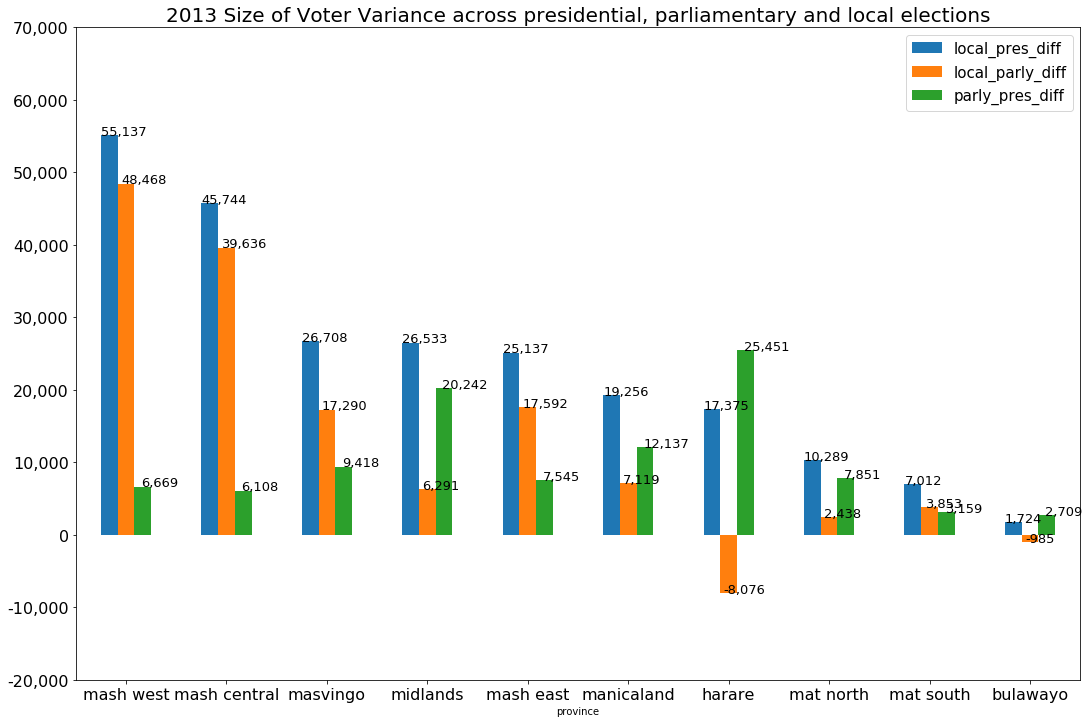

In [2431]:
d=dvto[[c for c in dvto.columns if 'diff' in c][::-1]].sort_values(by="local_pres_diff", ascending=False)
print("\nTotal/sum of variances \n","--"*20,  "\n"  ,
      d.sum().apply(lambda x: sep1000Formatter(x)) ,
      "\n" ,   "--"*20    , "\n"   )
g = d.plot(kind="bar", title="2013 Size of Voter Variance across presidential, parliamentary and local elections",
          figsize=(18,12), fontsize=16)
g.set_ylim(-20000,70000)

g.set_xticklabels(d.index,rotation=0, size=16)
g.title.set_size(20)
g.legend(fontsize=15)
g.get_yaxis().set_major_formatter(tic.FuncFormatter(lambda x, p: format(int(x), ',')))
for j in range(len(d)):
    g.text(j-0.25, d.iloc[j,0],sep1000Formatter(d.iloc[j,0]), fontsize=13)
    g.text( j-0.05, d.iloc[j,1], sep1000Formatter(d.iloc[j,1]), fontsize=13)
    g.text(j+0.15,d.iloc[j,2] ,sep1000Formatter(d.iloc[j,2]), fontsize=13)

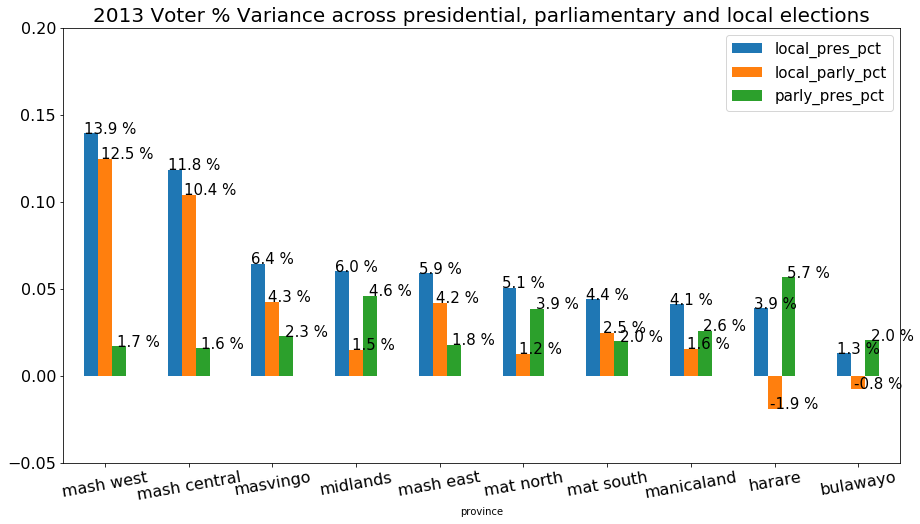

In [2435]:
d=dvto[[c for c in dvto.columns if 'pct' in c][::-1]].sort_values(by="local_pres_pct", ascending=False)
g = d.plot(kind="bar",
           title="2013 Voter % Variance across presidential, parliamentary and local elections",
          figsize=(15,8), fontsize=16)
g.set_ylim(-0.05,0.2)

g.set_xticklabels(d.index,rotation=10, size=16)
g.title.set_size(20)
g.legend(fontsize=15)
#g.get_yaxis().set_major_formatter(tic.FuncFormatter(lambda x, p: format(int(x), ',')))
for j in range(len(d)):
    g.text(j-0.25, d.iloc[j,0],str(round(d.iloc[j,0]*100,1))+" %", fontsize=15)
    g.text( j-0.05, d.iloc[j,1], str(round(d.iloc[j,1]*100,1)) +" %", fontsize=15)
    g.text(j+0.15,d.iloc[j,2] ,str(round(d.iloc[j,2]*100,1))+" %", fontsize=15)

### Compare 2013 vs 2018 Presidential and Parliamentary Voter Numbers

#### Pull in the data from 2018 and merge with 2013

In [2476]:
# votersroll 2018
vr18 = pd.read_excel(TARGET+"votersroll_bypolstat_clean.xlsx")
print(vr18.shape)

# presidential 2018
r18 = pd.read_excel(TARGET+"results_bypolstat_clean.xlsx")
print(r18.shape)

# parliamentary 2018
p18= pd.read_excel(TARGET+"zimvotersroll2018_parly_byvotes.xlsx")
print(p18.shape)

(10985, 13)
(10973, 34)
(1626, 8)


In [2477]:
# Quick map and transform
last_map={'bulawayo metropolitan province':'bulawayo' ,
 'harare metropolitan province': 'harare',
 'manicaland province province': 'manicaland',
 'mashonaland central province': 'mash central',
 'mashonaland east province': 'mash east' ,
 'mashonaland west  province': 'mash west' ,
 'masvingo province': 'masvingo',
 'matabeleland north province': 'mat north',
 'matabeleland south province': 'mat south',
 'midlands province': 'midlands'}

#list(r18.province);

# Focus on only a few key columns for now
r18=r18.groupby(['province']).sum()['total_votes_cast'].reset_index()
r18.columns = ['province', 'pres18']
r18.loc[:,'province'] = r18.province.replace(last_map)
r18.set_index('province', inplace=True)
#print(r18)

p18=p18.groupby(['province']).sum()['votes'].reset_index()
p18.columns = ['province', 'parly18']
p18.set_index('province', inplace=True)
#print(p18)

d13 = dvto[['pres_votes_cast', 'parly_votes']].reset_index()
d13.columns = ['province', 'pres13', 'parly13']
d13.set_index('province', inplace=True)
#print(d13)

# Merge them all
comp = pd.concat([d13, r18, p18], axis=1)

#### Compare Presidential 2013 vs 2018

In [2502]:
comp;


Total/sum of votes 
 ---------------------------------------- 
 pres13    3,479,666
pres18    4,843,010
dtype: object 
 ---------------------------------------- 



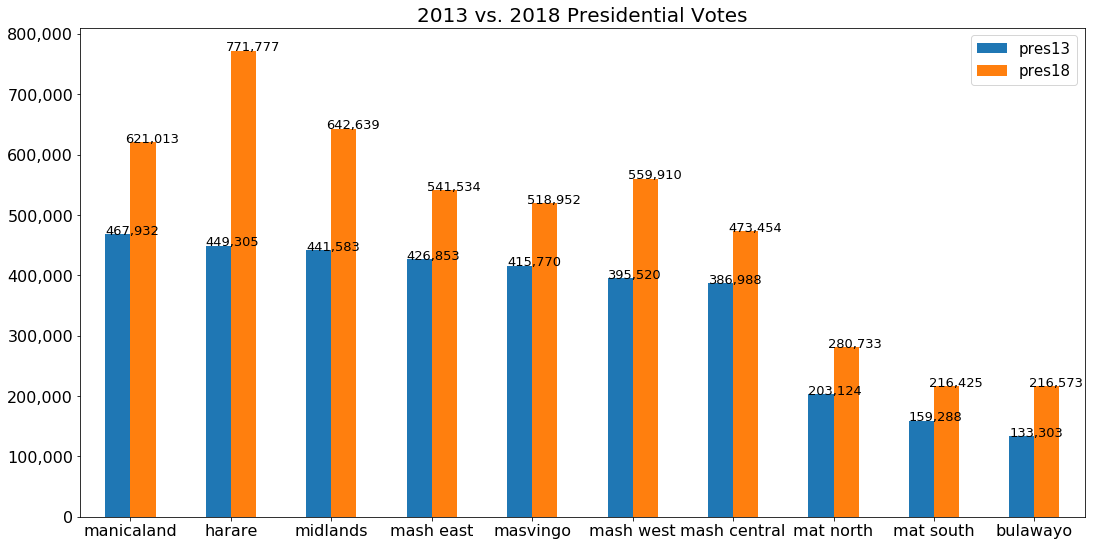

In [2499]:
d=comp[["pres13", "pres18"]].sort_values(by="pres13", ascending=False)
print("\nTotal/sum of votes \n","--"*20,  "\n"  ,
      d.sum().apply(lambda x: sep1000Formatter(x)) ,
      "\n" ,   "--"*20    , "\n"   )
g = d.plot(kind="bar", title="2013 vs. 2018 Presidential Votes",
          figsize=(18,9), fontsize=16)
g.set_xticklabels(d.index,rotation=0, size=16)
g.title.set_size(20)
g.legend(fontsize=15)
g.get_yaxis().set_major_formatter(tic.FuncFormatter(lambda x, p: format(int(x), ',')))
for j in range(len(d)):
    g.text(j-0.25, d.iloc[j,0],sep1000Formatter(d.iloc[j,0]), fontsize=13)
    g.text( j-0.05, d.iloc[j,1], sep1000Formatter(d.iloc[j,1]), fontsize=13)

#### Compare Parliamentary 2013 vs 2018


Total/sum of votes 
 ---------------------------------------- 
 parly13    3,378,377
parly18    4,692,652
dtype: object 
 ---------------------------------------- 



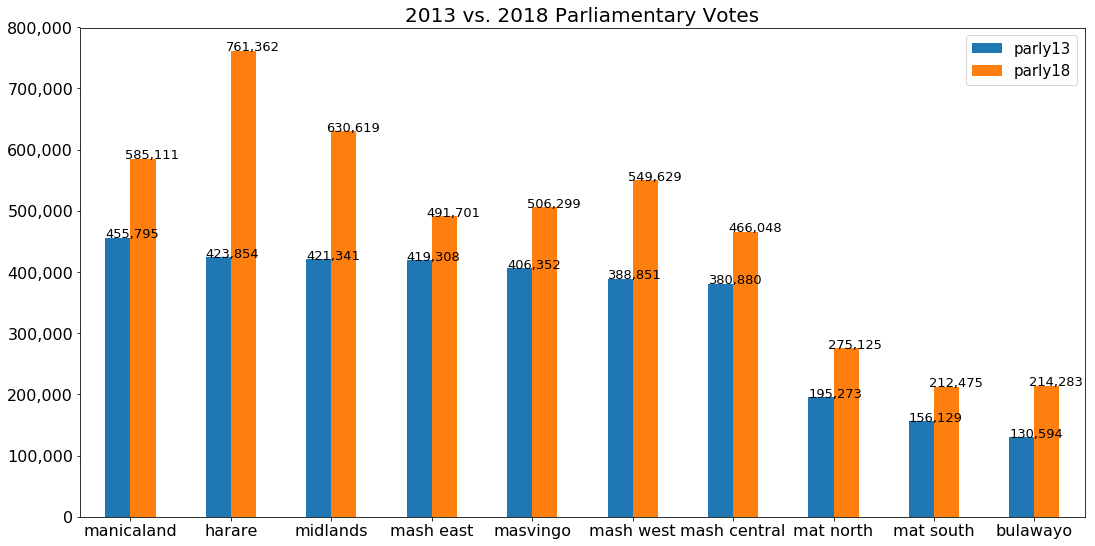

In [2501]:
d=comp[["parly13", "parly18"]].sort_values(by="parly13", ascending=False)
print("\nTotal/sum of votes \n","--"*20,  "\n"  ,
      d.sum().apply(lambda x: sep1000Formatter(x)) ,
      "\n" ,   "--"*20    , "\n"   )
g = d.plot(kind="bar", title="2013 vs. 2018 Parliamentary Votes",
          figsize=(18,9), fontsize=16)
g.set_xticklabels(d.index,rotation=0, size=16)
g.title.set_size(20)
g.legend(fontsize=15)
g.get_yaxis().set_major_formatter(tic.FuncFormatter(lambda x, p: format(int(x), ',')))
for j in range(len(d)):
    g.text(j-0.25, d.iloc[j,0],sep1000Formatter(d.iloc[j,0]), fontsize=13)
    g.text( j-0.05, d.iloc[j,1], sep1000Formatter(d.iloc[j,1]), fontsize=13)